In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
# Read an image
img = cv2.imread('../../../Desktop/pp.jpeg')

In [3]:
def bgr_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

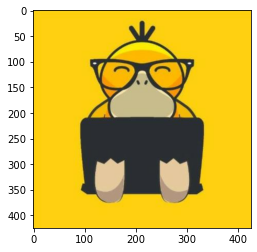

In [4]:
plt.imshow(bgr_to_rgb(img))

img = bgr_to_rgb(img)

In [5]:
img.shape

(425, 425, 3)

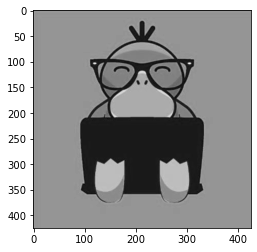

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [7]:
r, g, b = cv2.split(img)

In [8]:
x = np.ravel(r)
len(x)

180625

(array([ 26966.,   5333.,   1417.,    949.,    879.,    844.,   2929.,
          8408.,   7112., 125788.]),
 array([ 25.,  48.,  71.,  94., 117., 140., 163., 186., 209., 232., 255.]),
 <a list of 10 Patch objects>)

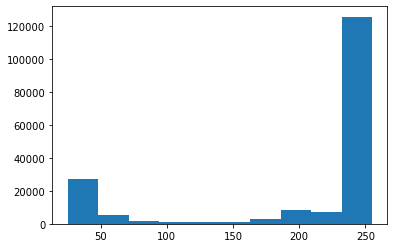

In [9]:
plt.hist(x, bins=10)

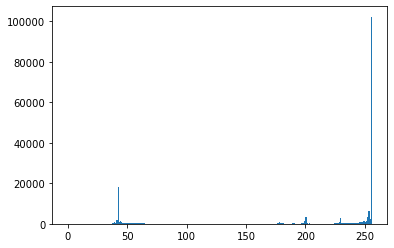

In [10]:
plt.hist(x, bins=256, range=(0, 256));

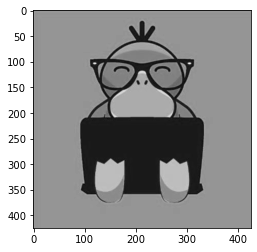

In [11]:
plt.imshow(gray, cmap='gray')

In [12]:
img.shape

(425, 425, 3)

In [13]:
blue_img = img[:, :, 0]
green_img = img[:, :, 1]
red_img = img[:, :, 2]

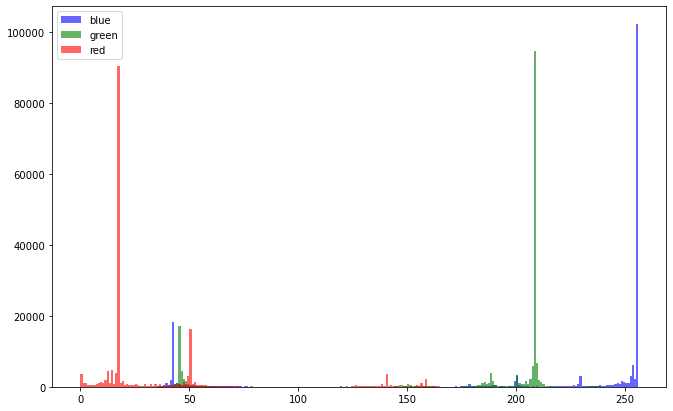

In [14]:
plt.figure(figsize = (11, 7))
plt.hist(np.ravel(blue_img), bins=256, color='blue', label='blue', range=(0, 256), alpha=0.6)
plt.hist(np.ravel(green_img), bins=256, color='green', label='green', range=(0, 256), alpha=0.6)
plt.hist(np.ravel(red_img), bins=256, color='red', label='red', range=(0, 256), alpha=0.6)
plt.legend()
plt.show()

## Image Manipulation

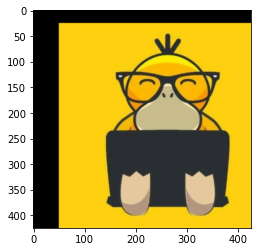

In [15]:
# 1. Translation
x = 50
y = 25

TM = np.float32([[1, 0, x], [0, 1, y]])
img_t = cv2.warpAffine(img, TM, img.shape[::-1][1:])
plt.imshow(img_t)

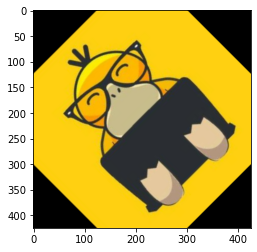

In [16]:
# 2. Rotation
# Angle and Point Needed

h, w = img.shape[:2]

RM = cv2.getRotationMatrix2D((h//2, w//2), 45, 1.0)
img_r = cv2.warpAffine(img, RM, img.shape[::-1][1:])
plt.imshow(img_r)

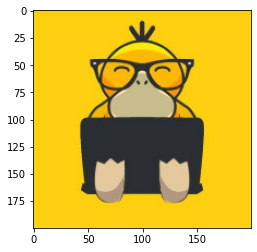

In [17]:
# 3. Resize
# Aspect Ratio, Size

aspect_ratio = img.shape[0] / img.shape[1]
W = 200
H = aspect_ratio * W

rez = cv2.resize(img, (int(W), int(H)), cv2.INTER_AREA)
plt.imshow(rez)

In [18]:
rez.shape

(200, 200, 3)

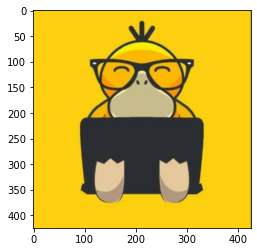

In [19]:
# 4. Flip
img_f1 = cv2.flip(img, -1) # Flip by x
img_f2 = cv2.flip(img, 0)  # Flip by y
img_f3 = cv2.flip(img, 1)  # Flip by x and y, both

# plt.imshow(img_f2)
plt.imshow(img_f3)

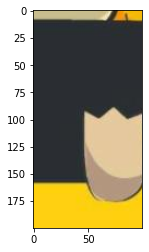

In [20]:
# 5. Cropping

# w = 200 -> 400
# h = 200 -> 300
c1 = img[200:400, 200: 300]
plt.imshow(c1)

## Image Processing

In [21]:
x = np.uint8([100])
y = np.uint8([200])

x + y

array([44], dtype=uint8)

In [22]:
np.uint8([100]) + np.uint8([200])

array([44], dtype=uint8)

In [23]:
cv2.add(x, y)

array([[255]], dtype=uint8)

In [24]:
bd = np.ones(img.shape, dtype='uint8') * 50

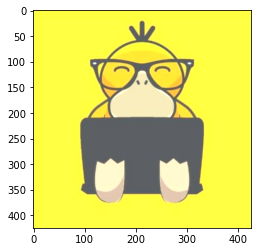

In [25]:
# Bright
img_bright = cv2.add(img, bd)
plt.imshow(img_bright)

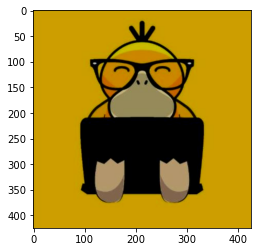

In [26]:
# Darken
img_darken = cv2.subtract(img, bd)
plt.imshow(img_darken)

## Blurring 

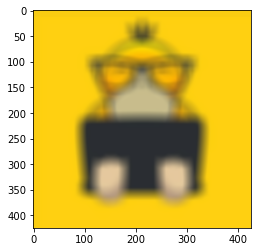

In [34]:
# 1. Averaging
avg = cv2.blur(img, (25, 25))

plt.imshow(avg)

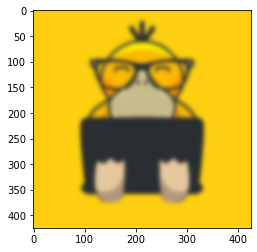

In [38]:
# 2. Gaussian
gaus = cv2.GaussianBlur(img, (25, 25), 0)

plt.imshow(gaus)

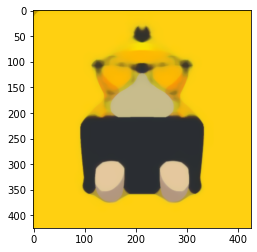

In [40]:
# 3. Medians
med = cv2.medianBlur(img, 25)

plt.imshow(med)

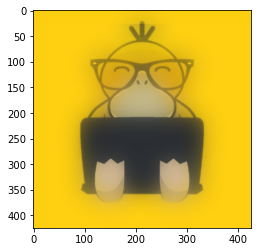

In [45]:
# 4. BiLateral
bilat = cv2.bilateralFilter(img, 100, 250, 25)

plt.imshow(bilat)